In [12]:
import numpy as np
import keras 
from keras import backend as k
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Flatten,Activation,Dense,Dropout,BatchNormalization
from keras.optimizers import Adamax
from keras.models import Model
import pickle
from keras.initializers import glorot_uniform
import cv2
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from  matplotlib import pyplot as plt
from IPython.display import clear_output

In [41]:
train_data = pd.read_csv('labels.csv') 
ids = []
ids = train_data['id'].values

In [42]:
# converting the name of dogs breed into numbers 
label_encoder = LabelEncoder().fit(train_data['breed'])
y_train = label_encoder.transform(train_data['breed']) 
y_train =to_categorical(y_train,120)
#converting y_train into a numpy array
y_train = np.asarray(y_train)

In [43]:
# no of unique classes
print('Unique classes: {}'.format(train_data['breed'].nunique()))

Unique classes: 120


In [9]:
inception = keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(80,80,3), pooling='max', classes=120
                                            )

  598016/83683744 [..............................] - ETA: 8:45:10

KeyboardInterrupt: 

In [44]:
vgg_model =VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))

In [45]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [46]:
model = Sequential()
for layers in vgg_model.layers:
    layers.trainable =True
    model.add(layers)

model.add(Flatten())
model.add(Dense(120, activation='softmax', name='my_dense_3'))

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [31]:
X_train= []
i =0
# no of images = 10221
while i<=10221:
    img_name = 'train/'+ids[i] + '.jpg'
    img = cv2.imread(img_name)
    img = cv2.resize(img,(64,64))
    X_train.append(img)
    print('loading image no: ',i)
    i = i +1
X_train = np.asarray(X_train)

loading image no:  0
loading image no:  1
loading image no:  2
loading image no:  3
loading image no:  4
loading image no:  5
loading image no:  6
loading image no:  7
loading image no:  8
loading image no:  9
loading image no:  10
loading image no:  11
loading image no:  12
loading image no:  13
loading image no:  14
loading image no:  15
loading image no:  16
loading image no:  17
loading image no:  18
loading image no:  19
loading image no:  20
loading image no:  21
loading image no:  22
loading image no:  23
loading image no:  24
loading image no:  25
loading image no:  26
loading image no:  27
loading image no:  28
loading image no:  29
loading image no:  30
loading image no:  31
loading image no:  32
loading image no:  33
loading image no:  34
loading image no:  35
loading image no:  36
loading image no:  37
loading image no:  38
loading image no:  39
loading image no:  40
loading image no:  41
loading image no:  42
loading image no:  43
loading image no:  44
loading image no:  4

loading image no:  388
loading image no:  389
loading image no:  390
loading image no:  391
loading image no:  392
loading image no:  393
loading image no:  394
loading image no:  395
loading image no:  396
loading image no:  397
loading image no:  398
loading image no:  399
loading image no:  400
loading image no:  401
loading image no:  402
loading image no:  403
loading image no:  404
loading image no:  405
loading image no:  406
loading image no:  407
loading image no:  408
loading image no:  409
loading image no:  410
loading image no:  411
loading image no:  412
loading image no:  413
loading image no:  414
loading image no:  415
loading image no:  416
loading image no:  417
loading image no:  418
loading image no:  419
loading image no:  420
loading image no:  421
loading image no:  422
loading image no:  423
loading image no:  424
loading image no:  425
loading image no:  426
loading image no:  427
loading image no:  428
loading image no:  429
loading image no:  430
loading ima

loading image no:  745
loading image no:  746
loading image no:  747
loading image no:  748
loading image no:  749
loading image no:  750
loading image no:  751
loading image no:  752
loading image no:  753
loading image no:  754
loading image no:  755
loading image no:  756
loading image no:  757
loading image no:  758
loading image no:  759
loading image no:  760
loading image no:  761
loading image no:  762
loading image no:  763
loading image no:  764
loading image no:  765
loading image no:  766
loading image no:  767
loading image no:  768
loading image no:  769
loading image no:  770
loading image no:  771
loading image no:  772
loading image no:  773
loading image no:  774
loading image no:  775
loading image no:  776
loading image no:  777
loading image no:  778
loading image no:  779
loading image no:  780
loading image no:  781
loading image no:  782
loading image no:  783
loading image no:  784
loading image no:  785
loading image no:  786
loading image no:  787
loading ima

loading image no:  1106
loading image no:  1107
loading image no:  1108
loading image no:  1109
loading image no:  1110
loading image no:  1111
loading image no:  1112
loading image no:  1113
loading image no:  1114
loading image no:  1115
loading image no:  1116
loading image no:  1117
loading image no:  1118
loading image no:  1119
loading image no:  1120
loading image no:  1121
loading image no:  1122
loading image no:  1123
loading image no:  1124
loading image no:  1125
loading image no:  1126
loading image no:  1127
loading image no:  1128
loading image no:  1129
loading image no:  1130
loading image no:  1131
loading image no:  1132
loading image no:  1133
loading image no:  1134
loading image no:  1135
loading image no:  1136
loading image no:  1137
loading image no:  1138
loading image no:  1139
loading image no:  1140
loading image no:  1141
loading image no:  1142
loading image no:  1143
loading image no:  1144
loading image no:  1145
loading image no:  1146
loading image no

loading image no:  1449
loading image no:  1450
loading image no:  1451
loading image no:  1452
loading image no:  1453
loading image no:  1454
loading image no:  1455
loading image no:  1456
loading image no:  1457
loading image no:  1458
loading image no:  1459
loading image no:  1460
loading image no:  1461
loading image no:  1462
loading image no:  1463
loading image no:  1464
loading image no:  1465
loading image no:  1466
loading image no:  1467
loading image no:  1468
loading image no:  1469
loading image no:  1470
loading image no:  1471
loading image no:  1472
loading image no:  1473
loading image no:  1474
loading image no:  1475
loading image no:  1476
loading image no:  1477
loading image no:  1478
loading image no:  1479
loading image no:  1480
loading image no:  1481
loading image no:  1482
loading image no:  1483
loading image no:  1484
loading image no:  1485
loading image no:  1486
loading image no:  1487
loading image no:  1488
loading image no:  1489
loading image no

loading image no:  1793
loading image no:  1794
loading image no:  1795
loading image no:  1796
loading image no:  1797
loading image no:  1798
loading image no:  1799
loading image no:  1800
loading image no:  1801
loading image no:  1802
loading image no:  1803
loading image no:  1804
loading image no:  1805
loading image no:  1806
loading image no:  1807
loading image no:  1808
loading image no:  1809
loading image no:  1810
loading image no:  1811
loading image no:  1812
loading image no:  1813
loading image no:  1814
loading image no:  1815
loading image no:  1816
loading image no:  1817
loading image no:  1818
loading image no:  1819
loading image no:  1820
loading image no:  1821
loading image no:  1822
loading image no:  1823
loading image no:  1824
loading image no:  1825
loading image no:  1826
loading image no:  1827
loading image no:  1828
loading image no:  1829
loading image no:  1830
loading image no:  1831
loading image no:  1832
loading image no:  1833
loading image no

loading image no:  2141
loading image no:  2142
loading image no:  2143
loading image no:  2144
loading image no:  2145
loading image no:  2146
loading image no:  2147
loading image no:  2148
loading image no:  2149
loading image no:  2150
loading image no:  2151
loading image no:  2152
loading image no:  2153
loading image no:  2154
loading image no:  2155
loading image no:  2156
loading image no:  2157
loading image no:  2158
loading image no:  2159
loading image no:  2160
loading image no:  2161
loading image no:  2162
loading image no:  2163
loading image no:  2164
loading image no:  2165
loading image no:  2166
loading image no:  2167
loading image no:  2168
loading image no:  2169
loading image no:  2170
loading image no:  2171
loading image no:  2172
loading image no:  2173
loading image no:  2174
loading image no:  2175
loading image no:  2176
loading image no:  2177
loading image no:  2178
loading image no:  2179
loading image no:  2180
loading image no:  2181
loading image no

loading image no:  2486
loading image no:  2487
loading image no:  2488
loading image no:  2489
loading image no:  2490
loading image no:  2491
loading image no:  2492
loading image no:  2493
loading image no:  2494
loading image no:  2495
loading image no:  2496
loading image no:  2497
loading image no:  2498
loading image no:  2499
loading image no:  2500
loading image no:  2501
loading image no:  2502
loading image no:  2503
loading image no:  2504
loading image no:  2505
loading image no:  2506
loading image no:  2507
loading image no:  2508
loading image no:  2509
loading image no:  2510
loading image no:  2511
loading image no:  2512
loading image no:  2513
loading image no:  2514
loading image no:  2515
loading image no:  2516
loading image no:  2517
loading image no:  2518
loading image no:  2519
loading image no:  2520
loading image no:  2521
loading image no:  2522
loading image no:  2523
loading image no:  2524
loading image no:  2525
loading image no:  2526
loading image no

loading image no:  2839
loading image no:  2840
loading image no:  2841
loading image no:  2842
loading image no:  2843
loading image no:  2844
loading image no:  2845
loading image no:  2846
loading image no:  2847
loading image no:  2848
loading image no:  2849
loading image no:  2850
loading image no:  2851
loading image no:  2852
loading image no:  2853
loading image no:  2854
loading image no:  2855
loading image no:  2856
loading image no:  2857
loading image no:  2858
loading image no:  2859
loading image no:  2860
loading image no:  2861
loading image no:  2862
loading image no:  2863
loading image no:  2864
loading image no:  2865
loading image no:  2866
loading image no:  2867
loading image no:  2868
loading image no:  2869
loading image no:  2870
loading image no:  2871
loading image no:  2872
loading image no:  2873
loading image no:  2874
loading image no:  2875
loading image no:  2876
loading image no:  2877
loading image no:  2878
loading image no:  2879
loading image no

loading image no:  3186
loading image no:  3187
loading image no:  3188
loading image no:  3189
loading image no:  3190
loading image no:  3191
loading image no:  3192
loading image no:  3193
loading image no:  3194
loading image no:  3195
loading image no:  3196
loading image no:  3197
loading image no:  3198
loading image no:  3199
loading image no:  3200
loading image no:  3201
loading image no:  3202
loading image no:  3203
loading image no:  3204
loading image no:  3205
loading image no:  3206
loading image no:  3207
loading image no:  3208
loading image no:  3209
loading image no:  3210
loading image no:  3211
loading image no:  3212
loading image no:  3213
loading image no:  3214
loading image no:  3215
loading image no:  3216
loading image no:  3217
loading image no:  3218
loading image no:  3219
loading image no:  3220
loading image no:  3221
loading image no:  3222
loading image no:  3223
loading image no:  3224
loading image no:  3225
loading image no:  3226
loading image no

loading image no:  3529
loading image no:  3530
loading image no:  3531
loading image no:  3532
loading image no:  3533
loading image no:  3534
loading image no:  3535
loading image no:  3536
loading image no:  3537
loading image no:  3538
loading image no:  3539
loading image no:  3540
loading image no:  3541
loading image no:  3542
loading image no:  3543
loading image no:  3544
loading image no:  3545
loading image no:  3546
loading image no:  3547
loading image no:  3548
loading image no:  3549
loading image no:  3550
loading image no:  3551
loading image no:  3552
loading image no:  3553
loading image no:  3554
loading image no:  3555
loading image no:  3556
loading image no:  3557
loading image no:  3558
loading image no:  3559
loading image no:  3560
loading image no:  3561
loading image no:  3562
loading image no:  3563
loading image no:  3564
loading image no:  3565
loading image no:  3566
loading image no:  3567
loading image no:  3568
loading image no:  3569
loading image no

loading image no:  3892
loading image no:  3893
loading image no:  3894
loading image no:  3895
loading image no:  3896
loading image no:  3897
loading image no:  3898
loading image no:  3899
loading image no:  3900
loading image no:  3901
loading image no:  3902
loading image no:  3903
loading image no:  3904
loading image no:  3905
loading image no:  3906
loading image no:  3907
loading image no:  3908
loading image no:  3909
loading image no:  3910
loading image no:  3911
loading image no:  3912
loading image no:  3913
loading image no:  3914
loading image no:  3915
loading image no:  3916
loading image no:  3917
loading image no:  3918
loading image no:  3919
loading image no:  3920
loading image no:  3921
loading image no:  3922
loading image no:  3923
loading image no:  3924
loading image no:  3925
loading image no:  3926
loading image no:  3927
loading image no:  3928
loading image no:  3929
loading image no:  3930
loading image no:  3931
loading image no:  3932
loading image no

loading image no:  4240
loading image no:  4241
loading image no:  4242
loading image no:  4243
loading image no:  4244
loading image no:  4245
loading image no:  4246
loading image no:  4247
loading image no:  4248
loading image no:  4249
loading image no:  4250
loading image no:  4251
loading image no:  4252
loading image no:  4253
loading image no:  4254
loading image no:  4255
loading image no:  4256
loading image no:  4257
loading image no:  4258
loading image no:  4259
loading image no:  4260
loading image no:  4261
loading image no:  4262
loading image no:  4263
loading image no:  4264
loading image no:  4265
loading image no:  4266
loading image no:  4267
loading image no:  4268
loading image no:  4269
loading image no:  4270
loading image no:  4271
loading image no:  4272
loading image no:  4273
loading image no:  4274
loading image no:  4275
loading image no:  4276
loading image no:  4277
loading image no:  4278
loading image no:  4279
loading image no:  4280
loading image no

loading image no:  4584
loading image no:  4585
loading image no:  4586
loading image no:  4587
loading image no:  4588
loading image no:  4589
loading image no:  4590
loading image no:  4591
loading image no:  4592
loading image no:  4593
loading image no:  4594
loading image no:  4595
loading image no:  4596
loading image no:  4597
loading image no:  4598
loading image no:  4599
loading image no:  4600
loading image no:  4601
loading image no:  4602
loading image no:  4603
loading image no:  4604
loading image no:  4605
loading image no:  4606
loading image no:  4607
loading image no:  4608
loading image no:  4609
loading image no:  4610
loading image no:  4611
loading image no:  4612
loading image no:  4613
loading image no:  4614
loading image no:  4615
loading image no:  4616
loading image no:  4617
loading image no:  4618
loading image no:  4619
loading image no:  4620
loading image no:  4621
loading image no:  4622
loading image no:  4623
loading image no:  4624
loading image no

loading image no:  4932
loading image no:  4933
loading image no:  4934
loading image no:  4935
loading image no:  4936
loading image no:  4937
loading image no:  4938
loading image no:  4939
loading image no:  4940
loading image no:  4941
loading image no:  4942
loading image no:  4943
loading image no:  4944
loading image no:  4945
loading image no:  4946
loading image no:  4947
loading image no:  4948
loading image no:  4949
loading image no:  4950
loading image no:  4951
loading image no:  4952
loading image no:  4953
loading image no:  4954
loading image no:  4955
loading image no:  4956
loading image no:  4957
loading image no:  4958
loading image no:  4959
loading image no:  4960
loading image no:  4961
loading image no:  4962
loading image no:  4963
loading image no:  4964
loading image no:  4965
loading image no:  4966
loading image no:  4967
loading image no:  4968
loading image no:  4969
loading image no:  4970
loading image no:  4971
loading image no:  4972
loading image no

loading image no:  5281
loading image no:  5282
loading image no:  5283
loading image no:  5284
loading image no:  5285
loading image no:  5286
loading image no:  5287
loading image no:  5288
loading image no:  5289
loading image no:  5290
loading image no:  5291
loading image no:  5292
loading image no:  5293
loading image no:  5294
loading image no:  5295
loading image no:  5296
loading image no:  5297
loading image no:  5298
loading image no:  5299
loading image no:  5300
loading image no:  5301
loading image no:  5302
loading image no:  5303
loading image no:  5304
loading image no:  5305
loading image no:  5306
loading image no:  5307
loading image no:  5308
loading image no:  5309
loading image no:  5310
loading image no:  5311
loading image no:  5312
loading image no:  5313
loading image no:  5314
loading image no:  5315
loading image no:  5316
loading image no:  5317
loading image no:  5318
loading image no:  5319
loading image no:  5320
loading image no:  5321
loading image no

loading image no:  5633
loading image no:  5634
loading image no:  5635
loading image no:  5636
loading image no:  5637
loading image no:  5638
loading image no:  5639
loading image no:  5640
loading image no:  5641
loading image no:  5642
loading image no:  5643
loading image no:  5644
loading image no:  5645
loading image no:  5646
loading image no:  5647
loading image no:  5648
loading image no:  5649
loading image no:  5650
loading image no:  5651
loading image no:  5652
loading image no:  5653
loading image no:  5654
loading image no:  5655
loading image no:  5656
loading image no:  5657
loading image no:  5658
loading image no:  5659
loading image no:  5660
loading image no:  5661
loading image no:  5662
loading image no:  5663
loading image no:  5664
loading image no:  5665
loading image no:  5666
loading image no:  5667
loading image no:  5668
loading image no:  5669
loading image no:  5670
loading image no:  5671
loading image no:  5672
loading image no:  5673
loading image no

loading image no:  5975
loading image no:  5976
loading image no:  5977
loading image no:  5978
loading image no:  5979
loading image no:  5980
loading image no:  5981
loading image no:  5982
loading image no:  5983
loading image no:  5984
loading image no:  5985
loading image no:  5986
loading image no:  5987
loading image no:  5988
loading image no:  5989
loading image no:  5990
loading image no:  5991
loading image no:  5992
loading image no:  5993
loading image no:  5994
loading image no:  5995
loading image no:  5996
loading image no:  5997
loading image no:  5998
loading image no:  5999
loading image no:  6000
loading image no:  6001
loading image no:  6002
loading image no:  6003
loading image no:  6004
loading image no:  6005
loading image no:  6006
loading image no:  6007
loading image no:  6008
loading image no:  6009
loading image no:  6010
loading image no:  6011
loading image no:  6012
loading image no:  6013
loading image no:  6014
loading image no:  6015
loading image no

loading image no:  6324
loading image no:  6325
loading image no:  6326
loading image no:  6327
loading image no:  6328
loading image no:  6329
loading image no:  6330
loading image no:  6331
loading image no:  6332
loading image no:  6333
loading image no:  6334
loading image no:  6335
loading image no:  6336
loading image no:  6337
loading image no:  6338
loading image no:  6339
loading image no:  6340
loading image no:  6341
loading image no:  6342
loading image no:  6343
loading image no:  6344
loading image no:  6345
loading image no:  6346
loading image no:  6347
loading image no:  6348
loading image no:  6349
loading image no:  6350
loading image no:  6351
loading image no:  6352
loading image no:  6353
loading image no:  6354
loading image no:  6355
loading image no:  6356
loading image no:  6357
loading image no:  6358
loading image no:  6359
loading image no:  6360
loading image no:  6361
loading image no:  6362
loading image no:  6363
loading image no:  6364
loading image no

loading image no:  6678
loading image no:  6679
loading image no:  6680
loading image no:  6681
loading image no:  6682
loading image no:  6683
loading image no:  6684
loading image no:  6685
loading image no:  6686
loading image no:  6687
loading image no:  6688
loading image no:  6689
loading image no:  6690
loading image no:  6691
loading image no:  6692
loading image no:  6693
loading image no:  6694
loading image no:  6695
loading image no:  6696
loading image no:  6697
loading image no:  6698
loading image no:  6699
loading image no:  6700
loading image no:  6701
loading image no:  6702
loading image no:  6703
loading image no:  6704
loading image no:  6705
loading image no:  6706
loading image no:  6707
loading image no:  6708
loading image no:  6709
loading image no:  6710
loading image no:  6711
loading image no:  6712
loading image no:  6713
loading image no:  6714
loading image no:  6715
loading image no:  6716
loading image no:  6717
loading image no:  6718
loading image no

loading image no:  7028
loading image no:  7029
loading image no:  7030
loading image no:  7031
loading image no:  7032
loading image no:  7033
loading image no:  7034
loading image no:  7035
loading image no:  7036
loading image no:  7037
loading image no:  7038
loading image no:  7039
loading image no:  7040
loading image no:  7041
loading image no:  7042
loading image no:  7043
loading image no:  7044
loading image no:  7045
loading image no:  7046
loading image no:  7047
loading image no:  7048
loading image no:  7049
loading image no:  7050
loading image no:  7051
loading image no:  7052
loading image no:  7053
loading image no:  7054
loading image no:  7055
loading image no:  7056
loading image no:  7057
loading image no:  7058
loading image no:  7059
loading image no:  7060
loading image no:  7061
loading image no:  7062
loading image no:  7063
loading image no:  7064
loading image no:  7065
loading image no:  7066
loading image no:  7067
loading image no:  7068
loading image no

loading image no:  7375
loading image no:  7376
loading image no:  7377
loading image no:  7378
loading image no:  7379
loading image no:  7380
loading image no:  7381
loading image no:  7382
loading image no:  7383
loading image no:  7384
loading image no:  7385
loading image no:  7386
loading image no:  7387
loading image no:  7388
loading image no:  7389
loading image no:  7390
loading image no:  7391
loading image no:  7392
loading image no:  7393
loading image no:  7394
loading image no:  7395
loading image no:  7396
loading image no:  7397
loading image no:  7398
loading image no:  7399
loading image no:  7400
loading image no:  7401
loading image no:  7402
loading image no:  7403
loading image no:  7404
loading image no:  7405
loading image no:  7406
loading image no:  7407
loading image no:  7408
loading image no:  7409
loading image no:  7410
loading image no:  7411
loading image no:  7412
loading image no:  7413
loading image no:  7414
loading image no:  7415
loading image no

loading image no:  7731
loading image no:  7732
loading image no:  7733
loading image no:  7734
loading image no:  7735
loading image no:  7736
loading image no:  7737
loading image no:  7738
loading image no:  7739
loading image no:  7740
loading image no:  7741
loading image no:  7742
loading image no:  7743
loading image no:  7744
loading image no:  7745
loading image no:  7746
loading image no:  7747
loading image no:  7748
loading image no:  7749
loading image no:  7750
loading image no:  7751
loading image no:  7752
loading image no:  7753
loading image no:  7754
loading image no:  7755
loading image no:  7756
loading image no:  7757
loading image no:  7758
loading image no:  7759
loading image no:  7760
loading image no:  7761
loading image no:  7762
loading image no:  7763
loading image no:  7764
loading image no:  7765
loading image no:  7766
loading image no:  7767
loading image no:  7768
loading image no:  7769
loading image no:  7770
loading image no:  7771
loading image no

loading image no:  8087
loading image no:  8088
loading image no:  8089
loading image no:  8090
loading image no:  8091
loading image no:  8092
loading image no:  8093
loading image no:  8094
loading image no:  8095
loading image no:  8096
loading image no:  8097
loading image no:  8098
loading image no:  8099
loading image no:  8100
loading image no:  8101
loading image no:  8102
loading image no:  8103
loading image no:  8104
loading image no:  8105
loading image no:  8106
loading image no:  8107
loading image no:  8108
loading image no:  8109
loading image no:  8110
loading image no:  8111
loading image no:  8112
loading image no:  8113
loading image no:  8114
loading image no:  8115
loading image no:  8116
loading image no:  8117
loading image no:  8118
loading image no:  8119
loading image no:  8120
loading image no:  8121
loading image no:  8122
loading image no:  8123
loading image no:  8124
loading image no:  8125
loading image no:  8126
loading image no:  8127
loading image no

loading image no:  8444
loading image no:  8445
loading image no:  8446
loading image no:  8447
loading image no:  8448
loading image no:  8449
loading image no:  8450
loading image no:  8451
loading image no:  8452
loading image no:  8453
loading image no:  8454
loading image no:  8455
loading image no:  8456
loading image no:  8457
loading image no:  8458
loading image no:  8459
loading image no:  8460
loading image no:  8461
loading image no:  8462
loading image no:  8463
loading image no:  8464
loading image no:  8465
loading image no:  8466
loading image no:  8467
loading image no:  8468
loading image no:  8469
loading image no:  8470
loading image no:  8471
loading image no:  8472
loading image no:  8473
loading image no:  8474
loading image no:  8475
loading image no:  8476
loading image no:  8477
loading image no:  8478
loading image no:  8479
loading image no:  8480
loading image no:  8481
loading image no:  8482
loading image no:  8483
loading image no:  8484
loading image no

loading image no:  8787
loading image no:  8788
loading image no:  8789
loading image no:  8790
loading image no:  8791
loading image no:  8792
loading image no:  8793
loading image no:  8794
loading image no:  8795
loading image no:  8796
loading image no:  8797
loading image no:  8798
loading image no:  8799
loading image no:  8800
loading image no:  8801
loading image no:  8802
loading image no:  8803
loading image no:  8804
loading image no:  8805
loading image no:  8806
loading image no:  8807
loading image no:  8808
loading image no:  8809
loading image no:  8810
loading image no:  8811
loading image no:  8812
loading image no:  8813
loading image no:  8814
loading image no:  8815
loading image no:  8816
loading image no:  8817
loading image no:  8818
loading image no:  8819
loading image no:  8820
loading image no:  8821
loading image no:  8822
loading image no:  8823
loading image no:  8824
loading image no:  8825
loading image no:  8826
loading image no:  8827
loading image no

loading image no:  9152
loading image no:  9153
loading image no:  9154
loading image no:  9155
loading image no:  9156
loading image no:  9157
loading image no:  9158
loading image no:  9159
loading image no:  9160
loading image no:  9161
loading image no:  9162
loading image no:  9163
loading image no:  9164
loading image no:  9165
loading image no:  9166
loading image no:  9167
loading image no:  9168
loading image no:  9169
loading image no:  9170
loading image no:  9171
loading image no:  9172
loading image no:  9173
loading image no:  9174
loading image no:  9175
loading image no:  9176
loading image no:  9177
loading image no:  9178
loading image no:  9179
loading image no:  9180
loading image no:  9181
loading image no:  9182
loading image no:  9183
loading image no:  9184
loading image no:  9185
loading image no:  9186
loading image no:  9187
loading image no:  9188
loading image no:  9189
loading image no:  9190
loading image no:  9191
loading image no:  9192
loading image no

loading image no:  9495
loading image no:  9496
loading image no:  9497
loading image no:  9498
loading image no:  9499
loading image no:  9500
loading image no:  9501
loading image no:  9502
loading image no:  9503
loading image no:  9504
loading image no:  9505
loading image no:  9506
loading image no:  9507
loading image no:  9508
loading image no:  9509
loading image no:  9510
loading image no:  9511
loading image no:  9512
loading image no:  9513
loading image no:  9514
loading image no:  9515
loading image no:  9516
loading image no:  9517
loading image no:  9518
loading image no:  9519
loading image no:  9520
loading image no:  9521
loading image no:  9522
loading image no:  9523
loading image no:  9524
loading image no:  9525
loading image no:  9526
loading image no:  9527
loading image no:  9528
loading image no:  9529
loading image no:  9530
loading image no:  9531
loading image no:  9532
loading image no:  9533
loading image no:  9534
loading image no:  9535
loading image no

loading image no:  9845
loading image no:  9846
loading image no:  9847
loading image no:  9848
loading image no:  9849
loading image no:  9850
loading image no:  9851
loading image no:  9852
loading image no:  9853
loading image no:  9854
loading image no:  9855
loading image no:  9856
loading image no:  9857
loading image no:  9858
loading image no:  9859
loading image no:  9860
loading image no:  9861
loading image no:  9862
loading image no:  9863
loading image no:  9864
loading image no:  9865
loading image no:  9866
loading image no:  9867
loading image no:  9868
loading image no:  9869
loading image no:  9870
loading image no:  9871
loading image no:  9872
loading image no:  9873
loading image no:  9874
loading image no:  9875
loading image no:  9876
loading image no:  9877
loading image no:  9878
loading image no:  9879
loading image no:  9880
loading image no:  9881
loading image no:  9882
loading image no:  9883
loading image no:  9884
loading image no:  9885
loading image no

loading image no:  10180
loading image no:  10181
loading image no:  10182
loading image no:  10183
loading image no:  10184
loading image no:  10185
loading image no:  10186
loading image no:  10187
loading image no:  10188
loading image no:  10189
loading image no:  10190
loading image no:  10191
loading image no:  10192
loading image no:  10193
loading image no:  10194
loading image no:  10195
loading image no:  10196
loading image no:  10197
loading image no:  10198
loading image no:  10199
loading image no:  10200
loading image no:  10201
loading image no:  10202
loading image no:  10203
loading image no:  10204
loading image no:  10205
loading image no:  10206
loading image no:  10207
loading image no:  10208
loading image no:  10209
loading image no:  10210
loading image no:  10211
loading image no:  10212
loading image no:  10213
loading image no:  10214
loading image no:  10215
loading image no:  10216
loading image no:  10217
loading image no:  10218
loading image no:  10219


In [48]:
#X_train = X_train.reshape([-1,64,64,1])
X_train.shape

(10222, 64, 64, 3)

In [49]:
model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [50]:
#plot
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=.10 )

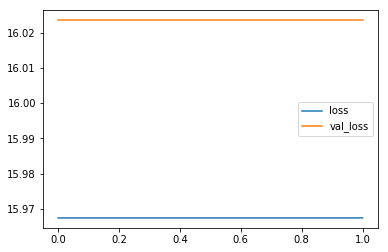

9199/9199 [==============================] - 2741s 298ms/step - loss: 15.9674 - acc: 0.0093 - val_loss: 16.0235 - val_acc: 0.0059
Epoch 3/10
1680/9199 [====>.........................] - ETA: 36:06 - loss: 15.9934 - acc: 0.0077

KeyboardInterrupt: 

In [56]:
model.fit(X_train, y_train,
          epochs = 10,
          batch_size = 420,
          validation_data = (X_test, y_test),
          callbacks = [plot_losses],
         verbose = 1)

In [ ]:
from keras.models import load_model
model.save('model.h5')
model = load_model('model.h5')

In [116]:
test_data =pd.read_csv('sample_submission.csv')
ids = []
ids = test_data['id']

000621fb3cbb32d8935728e48679680e


In [129]:

X_test= []
i =0
# no of images = 10356
while i<=10356:
    img_name = 'test/'+ids[i] + '.jpg'
    img = cv2.imread(img_name,0)
    img = cv2.resize(img,(64,64))
    X_test.append(img)
    print('loading image no: ',i)
    i = i +1
X_test = np.asarray(X_test)
X_test = X_test.reshape([-1,64,64,1])

loading image no:  0
loading image no:  1
loading image no:  2
loading image no:  3
loading image no:  4
loading image no:  5
loading image no:  6
loading image no:  7
loading image no:  8
loading image no:  9
loading image no:  10
loading image no:  11
loading image no:  12
loading image no:  13
loading image no:  14
loading image no:  15
loading image no:  16
loading image no:  17
loading image no:  18
loading image no:  19
loading image no:  20
loading image no:  21
loading image no:  22
loading image no:  23
loading image no:  24
loading image no:  25
loading image no:  26
loading image no:  27
loading image no:  28
loading image no:  29
loading image no:  30
loading image no:  31
loading image no:  32
loading image no:  33
loading image no:  34
loading image no:  35
loading image no:  36
loading image no:  37
loading image no:  38
loading image no:  39
loading image no:  40
loading image no:  41
loading image no:  42
loading image no:  43
loading image no:  44
loading image no:  4

loading image no:  362
loading image no:  363
loading image no:  364
loading image no:  365
loading image no:  366
loading image no:  367
loading image no:  368
loading image no:  369
loading image no:  370
loading image no:  371
loading image no:  372
loading image no:  373
loading image no:  374
loading image no:  375
loading image no:  376
loading image no:  377
loading image no:  378
loading image no:  379
loading image no:  380
loading image no:  381
loading image no:  382
loading image no:  383
loading image no:  384
loading image no:  385
loading image no:  386
loading image no:  387
loading image no:  388
loading image no:  389
loading image no:  390
loading image no:  391
loading image no:  392
loading image no:  393
loading image no:  394
loading image no:  395
loading image no:  396
loading image no:  397
loading image no:  398
loading image no:  399
loading image no:  400
loading image no:  401
loading image no:  402
loading image no:  403
loading image no:  404
loading ima

loading image no:  721
loading image no:  722
loading image no:  723
loading image no:  724
loading image no:  725
loading image no:  726
loading image no:  727
loading image no:  728
loading image no:  729
loading image no:  730
loading image no:  731
loading image no:  732
loading image no:  733
loading image no:  734
loading image no:  735
loading image no:  736
loading image no:  737
loading image no:  738
loading image no:  739
loading image no:  740
loading image no:  741
loading image no:  742
loading image no:  743
loading image no:  744
loading image no:  745
loading image no:  746
loading image no:  747
loading image no:  748
loading image no:  749
loading image no:  750
loading image no:  751
loading image no:  752
loading image no:  753
loading image no:  754
loading image no:  755
loading image no:  756
loading image no:  757
loading image no:  758
loading image no:  759
loading image no:  760
loading image no:  761
loading image no:  762
loading image no:  763
loading ima

loading image no:  1074
loading image no:  1075
loading image no:  1076
loading image no:  1077
loading image no:  1078
loading image no:  1079
loading image no:  1080
loading image no:  1081
loading image no:  1082
loading image no:  1083
loading image no:  1084
loading image no:  1085
loading image no:  1086
loading image no:  1087
loading image no:  1088
loading image no:  1089
loading image no:  1090
loading image no:  1091
loading image no:  1092
loading image no:  1093
loading image no:  1094
loading image no:  1095
loading image no:  1096
loading image no:  1097
loading image no:  1098
loading image no:  1099
loading image no:  1100
loading image no:  1101
loading image no:  1102
loading image no:  1103
loading image no:  1104
loading image no:  1105
loading image no:  1106
loading image no:  1107
loading image no:  1108
loading image no:  1109
loading image no:  1110
loading image no:  1111
loading image no:  1112
loading image no:  1113
loading image no:  1114
loading image no

loading image no:  1425
loading image no:  1426
loading image no:  1427
loading image no:  1428
loading image no:  1429
loading image no:  1430
loading image no:  1431
loading image no:  1432
loading image no:  1433
loading image no:  1434
loading image no:  1435
loading image no:  1436
loading image no:  1437
loading image no:  1438
loading image no:  1439
loading image no:  1440
loading image no:  1441
loading image no:  1442
loading image no:  1443
loading image no:  1444
loading image no:  1445
loading image no:  1446
loading image no:  1447
loading image no:  1448
loading image no:  1449
loading image no:  1450
loading image no:  1451
loading image no:  1452
loading image no:  1453
loading image no:  1454
loading image no:  1455
loading image no:  1456
loading image no:  1457
loading image no:  1458
loading image no:  1459
loading image no:  1460
loading image no:  1461
loading image no:  1462
loading image no:  1463
loading image no:  1464
loading image no:  1465
loading image no

loading image no:  1767
loading image no:  1768
loading image no:  1769
loading image no:  1770
loading image no:  1771
loading image no:  1772
loading image no:  1773
loading image no:  1774
loading image no:  1775
loading image no:  1776
loading image no:  1777
loading image no:  1778
loading image no:  1779
loading image no:  1780
loading image no:  1781
loading image no:  1782
loading image no:  1783
loading image no:  1784
loading image no:  1785
loading image no:  1786
loading image no:  1787
loading image no:  1788
loading image no:  1789
loading image no:  1790
loading image no:  1791
loading image no:  1792
loading image no:  1793
loading image no:  1794
loading image no:  1795
loading image no:  1796
loading image no:  1797
loading image no:  1798
loading image no:  1799
loading image no:  1800
loading image no:  1801
loading image no:  1802
loading image no:  1803
loading image no:  1804
loading image no:  1805
loading image no:  1806
loading image no:  1807
loading image no

loading image no:  2114
loading image no:  2115
loading image no:  2116
loading image no:  2117
loading image no:  2118
loading image no:  2119
loading image no:  2120
loading image no:  2121
loading image no:  2122
loading image no:  2123
loading image no:  2124
loading image no:  2125
loading image no:  2126
loading image no:  2127
loading image no:  2128
loading image no:  2129
loading image no:  2130
loading image no:  2131
loading image no:  2132
loading image no:  2133
loading image no:  2134
loading image no:  2135
loading image no:  2136
loading image no:  2137
loading image no:  2138
loading image no:  2139
loading image no:  2140
loading image no:  2141
loading image no:  2142
loading image no:  2143
loading image no:  2144
loading image no:  2145
loading image no:  2146
loading image no:  2147
loading image no:  2148
loading image no:  2149
loading image no:  2150
loading image no:  2151
loading image no:  2152
loading image no:  2153
loading image no:  2154
loading image no

loading image no:  2460
loading image no:  2461
loading image no:  2462
loading image no:  2463
loading image no:  2464
loading image no:  2465
loading image no:  2466
loading image no:  2467
loading image no:  2468
loading image no:  2469
loading image no:  2470
loading image no:  2471
loading image no:  2472
loading image no:  2473
loading image no:  2474
loading image no:  2475
loading image no:  2476
loading image no:  2477
loading image no:  2478
loading image no:  2479
loading image no:  2480
loading image no:  2481
loading image no:  2482
loading image no:  2483
loading image no:  2484
loading image no:  2485
loading image no:  2486
loading image no:  2487
loading image no:  2488
loading image no:  2489
loading image no:  2490
loading image no:  2491
loading image no:  2492
loading image no:  2493
loading image no:  2494
loading image no:  2495
loading image no:  2496
loading image no:  2497
loading image no:  2498
loading image no:  2499
loading image no:  2500
loading image no

loading image no:  2808
loading image no:  2809
loading image no:  2810
loading image no:  2811
loading image no:  2812
loading image no:  2813
loading image no:  2814
loading image no:  2815
loading image no:  2816
loading image no:  2817
loading image no:  2818
loading image no:  2819
loading image no:  2820
loading image no:  2821
loading image no:  2822
loading image no:  2823
loading image no:  2824
loading image no:  2825
loading image no:  2826
loading image no:  2827
loading image no:  2828
loading image no:  2829
loading image no:  2830
loading image no:  2831
loading image no:  2832
loading image no:  2833
loading image no:  2834
loading image no:  2835
loading image no:  2836
loading image no:  2837
loading image no:  2838
loading image no:  2839
loading image no:  2840
loading image no:  2841
loading image no:  2842
loading image no:  2843
loading image no:  2844
loading image no:  2845
loading image no:  2846
loading image no:  2847
loading image no:  2848
loading image no

loading image no:  3159
loading image no:  3160
loading image no:  3161
loading image no:  3162
loading image no:  3163
loading image no:  3164
loading image no:  3165
loading image no:  3166
loading image no:  3167
loading image no:  3168
loading image no:  3169
loading image no:  3170
loading image no:  3171
loading image no:  3172
loading image no:  3173
loading image no:  3174
loading image no:  3175
loading image no:  3176
loading image no:  3177
loading image no:  3178
loading image no:  3179
loading image no:  3180
loading image no:  3181
loading image no:  3182
loading image no:  3183
loading image no:  3184
loading image no:  3185
loading image no:  3186
loading image no:  3187
loading image no:  3188
loading image no:  3189
loading image no:  3190
loading image no:  3191
loading image no:  3192
loading image no:  3193
loading image no:  3194
loading image no:  3195
loading image no:  3196
loading image no:  3197
loading image no:  3198
loading image no:  3199
loading image no

loading image no:  3501
loading image no:  3502
loading image no:  3503
loading image no:  3504
loading image no:  3505
loading image no:  3506
loading image no:  3507
loading image no:  3508
loading image no:  3509
loading image no:  3510
loading image no:  3511
loading image no:  3512
loading image no:  3513
loading image no:  3514
loading image no:  3515
loading image no:  3516
loading image no:  3517
loading image no:  3518
loading image no:  3519
loading image no:  3520
loading image no:  3521
loading image no:  3522
loading image no:  3523
loading image no:  3524
loading image no:  3525
loading image no:  3526
loading image no:  3527
loading image no:  3528
loading image no:  3529
loading image no:  3530
loading image no:  3531
loading image no:  3532
loading image no:  3533
loading image no:  3534
loading image no:  3535
loading image no:  3536
loading image no:  3537
loading image no:  3538
loading image no:  3539
loading image no:  3540
loading image no:  3541
loading image no

loading image no:  3847
loading image no:  3848
loading image no:  3849
loading image no:  3850
loading image no:  3851
loading image no:  3852
loading image no:  3853
loading image no:  3854
loading image no:  3855
loading image no:  3856
loading image no:  3857
loading image no:  3858
loading image no:  3859
loading image no:  3860
loading image no:  3861
loading image no:  3862
loading image no:  3863
loading image no:  3864
loading image no:  3865
loading image no:  3866
loading image no:  3867
loading image no:  3868
loading image no:  3869
loading image no:  3870
loading image no:  3871
loading image no:  3872
loading image no:  3873
loading image no:  3874
loading image no:  3875
loading image no:  3876
loading image no:  3877
loading image no:  3878
loading image no:  3879
loading image no:  3880
loading image no:  3881
loading image no:  3882
loading image no:  3883
loading image no:  3884
loading image no:  3885
loading image no:  3886
loading image no:  3887
loading image no

loading image no:  4193
loading image no:  4194
loading image no:  4195
loading image no:  4196
loading image no:  4197
loading image no:  4198
loading image no:  4199
loading image no:  4200
loading image no:  4201
loading image no:  4202
loading image no:  4203
loading image no:  4204
loading image no:  4205
loading image no:  4206
loading image no:  4207
loading image no:  4208
loading image no:  4209
loading image no:  4210
loading image no:  4211
loading image no:  4212
loading image no:  4213
loading image no:  4214
loading image no:  4215
loading image no:  4216
loading image no:  4217
loading image no:  4218
loading image no:  4219
loading image no:  4220
loading image no:  4221
loading image no:  4222
loading image no:  4223
loading image no:  4224
loading image no:  4225
loading image no:  4226
loading image no:  4227
loading image no:  4228
loading image no:  4229
loading image no:  4230
loading image no:  4231
loading image no:  4232
loading image no:  4233
loading image no

loading image no:  4537
loading image no:  4538
loading image no:  4539
loading image no:  4540
loading image no:  4541
loading image no:  4542
loading image no:  4543
loading image no:  4544
loading image no:  4545
loading image no:  4546
loading image no:  4547
loading image no:  4548
loading image no:  4549
loading image no:  4550
loading image no:  4551
loading image no:  4552
loading image no:  4553
loading image no:  4554
loading image no:  4555
loading image no:  4556
loading image no:  4557
loading image no:  4558
loading image no:  4559
loading image no:  4560
loading image no:  4561
loading image no:  4562
loading image no:  4563
loading image no:  4564
loading image no:  4565
loading image no:  4566
loading image no:  4567
loading image no:  4568
loading image no:  4569
loading image no:  4570
loading image no:  4571
loading image no:  4572
loading image no:  4573
loading image no:  4574
loading image no:  4575
loading image no:  4576
loading image no:  4577
loading image no

loading image no:  4881
loading image no:  4882
loading image no:  4883
loading image no:  4884
loading image no:  4885
loading image no:  4886
loading image no:  4887
loading image no:  4888
loading image no:  4889
loading image no:  4890
loading image no:  4891
loading image no:  4892
loading image no:  4893
loading image no:  4894
loading image no:  4895
loading image no:  4896
loading image no:  4897
loading image no:  4898
loading image no:  4899
loading image no:  4900
loading image no:  4901
loading image no:  4902
loading image no:  4903
loading image no:  4904
loading image no:  4905
loading image no:  4906
loading image no:  4907
loading image no:  4908
loading image no:  4909
loading image no:  4910
loading image no:  4911
loading image no:  4912
loading image no:  4913
loading image no:  4914
loading image no:  4915
loading image no:  4916
loading image no:  4917
loading image no:  4918
loading image no:  4919
loading image no:  4920
loading image no:  4921
loading image no

loading image no:  5228
loading image no:  5229
loading image no:  5230
loading image no:  5231
loading image no:  5232
loading image no:  5233
loading image no:  5234
loading image no:  5235
loading image no:  5236
loading image no:  5237
loading image no:  5238
loading image no:  5239
loading image no:  5240
loading image no:  5241
loading image no:  5242
loading image no:  5243
loading image no:  5244
loading image no:  5245
loading image no:  5246
loading image no:  5247
loading image no:  5248
loading image no:  5249
loading image no:  5250
loading image no:  5251
loading image no:  5252
loading image no:  5253
loading image no:  5254
loading image no:  5255
loading image no:  5256
loading image no:  5257
loading image no:  5258
loading image no:  5259
loading image no:  5260
loading image no:  5261
loading image no:  5262
loading image no:  5263
loading image no:  5264
loading image no:  5265
loading image no:  5266
loading image no:  5267
loading image no:  5268
loading image no

loading image no:  5572
loading image no:  5573
loading image no:  5574
loading image no:  5575
loading image no:  5576
loading image no:  5577
loading image no:  5578
loading image no:  5579
loading image no:  5580
loading image no:  5581
loading image no:  5582
loading image no:  5583
loading image no:  5584
loading image no:  5585
loading image no:  5586
loading image no:  5587
loading image no:  5588
loading image no:  5589
loading image no:  5590
loading image no:  5591
loading image no:  5592
loading image no:  5593
loading image no:  5594
loading image no:  5595
loading image no:  5596
loading image no:  5597
loading image no:  5598
loading image no:  5599
loading image no:  5600
loading image no:  5601
loading image no:  5602
loading image no:  5603
loading image no:  5604
loading image no:  5605
loading image no:  5606
loading image no:  5607
loading image no:  5608
loading image no:  5609
loading image no:  5610
loading image no:  5611
loading image no:  5612
loading image no

loading image no:  5925
loading image no:  5926
loading image no:  5927
loading image no:  5928
loading image no:  5929
loading image no:  5930
loading image no:  5931
loading image no:  5932
loading image no:  5933
loading image no:  5934
loading image no:  5935
loading image no:  5936
loading image no:  5937
loading image no:  5938
loading image no:  5939
loading image no:  5940
loading image no:  5941
loading image no:  5942
loading image no:  5943
loading image no:  5944
loading image no:  5945
loading image no:  5946
loading image no:  5947
loading image no:  5948
loading image no:  5949
loading image no:  5950
loading image no:  5951
loading image no:  5952
loading image no:  5953
loading image no:  5954
loading image no:  5955
loading image no:  5956
loading image no:  5957
loading image no:  5958
loading image no:  5959
loading image no:  5960
loading image no:  5961
loading image no:  5962
loading image no:  5963
loading image no:  5964
loading image no:  5965
loading image no

loading image no:  6272
loading image no:  6273
loading image no:  6274
loading image no:  6275
loading image no:  6276
loading image no:  6277
loading image no:  6278
loading image no:  6279
loading image no:  6280
loading image no:  6281
loading image no:  6282
loading image no:  6283
loading image no:  6284
loading image no:  6285
loading image no:  6286
loading image no:  6287
loading image no:  6288
loading image no:  6289
loading image no:  6290
loading image no:  6291
loading image no:  6292
loading image no:  6293
loading image no:  6294
loading image no:  6295
loading image no:  6296
loading image no:  6297
loading image no:  6298
loading image no:  6299
loading image no:  6300
loading image no:  6301
loading image no:  6302
loading image no:  6303
loading image no:  6304
loading image no:  6305
loading image no:  6306
loading image no:  6307
loading image no:  6308
loading image no:  6309
loading image no:  6310
loading image no:  6311
loading image no:  6312
loading image no

loading image no:  6618
loading image no:  6619
loading image no:  6620
loading image no:  6621
loading image no:  6622
loading image no:  6623
loading image no:  6624
loading image no:  6625
loading image no:  6626
loading image no:  6627
loading image no:  6628
loading image no:  6629
loading image no:  6630
loading image no:  6631
loading image no:  6632
loading image no:  6633
loading image no:  6634
loading image no:  6635
loading image no:  6636
loading image no:  6637
loading image no:  6638
loading image no:  6639
loading image no:  6640
loading image no:  6641
loading image no:  6642
loading image no:  6643
loading image no:  6644
loading image no:  6645
loading image no:  6646
loading image no:  6647
loading image no:  6648
loading image no:  6649
loading image no:  6650
loading image no:  6651
loading image no:  6652
loading image no:  6653
loading image no:  6654
loading image no:  6655
loading image no:  6656
loading image no:  6657
loading image no:  6658
loading image no

loading image no:  6962
loading image no:  6963
loading image no:  6964
loading image no:  6965
loading image no:  6966
loading image no:  6967
loading image no:  6968
loading image no:  6969
loading image no:  6970
loading image no:  6971
loading image no:  6972
loading image no:  6973
loading image no:  6974
loading image no:  6975
loading image no:  6976
loading image no:  6977
loading image no:  6978
loading image no:  6979
loading image no:  6980
loading image no:  6981
loading image no:  6982
loading image no:  6983
loading image no:  6984
loading image no:  6985
loading image no:  6986
loading image no:  6987
loading image no:  6988
loading image no:  6989
loading image no:  6990
loading image no:  6991
loading image no:  6992
loading image no:  6993
loading image no:  6994
loading image no:  6995
loading image no:  6996
loading image no:  6997
loading image no:  6998
loading image no:  6999
loading image no:  7000
loading image no:  7001
loading image no:  7002
loading image no

loading image no:  7305
loading image no:  7306
loading image no:  7307
loading image no:  7308
loading image no:  7309
loading image no:  7310
loading image no:  7311
loading image no:  7312
loading image no:  7313
loading image no:  7314
loading image no:  7315
loading image no:  7316
loading image no:  7317
loading image no:  7318
loading image no:  7319
loading image no:  7320
loading image no:  7321
loading image no:  7322
loading image no:  7323
loading image no:  7324
loading image no:  7325
loading image no:  7326
loading image no:  7327
loading image no:  7328
loading image no:  7329
loading image no:  7330
loading image no:  7331
loading image no:  7332
loading image no:  7333
loading image no:  7334
loading image no:  7335
loading image no:  7336
loading image no:  7337
loading image no:  7338
loading image no:  7339
loading image no:  7340
loading image no:  7341
loading image no:  7342
loading image no:  7343
loading image no:  7344
loading image no:  7345
loading image no

loading image no:  7655
loading image no:  7656
loading image no:  7657
loading image no:  7658
loading image no:  7659
loading image no:  7660
loading image no:  7661
loading image no:  7662
loading image no:  7663
loading image no:  7664
loading image no:  7665
loading image no:  7666
loading image no:  7667
loading image no:  7668
loading image no:  7669
loading image no:  7670
loading image no:  7671
loading image no:  7672
loading image no:  7673
loading image no:  7674
loading image no:  7675
loading image no:  7676
loading image no:  7677
loading image no:  7678
loading image no:  7679
loading image no:  7680
loading image no:  7681
loading image no:  7682
loading image no:  7683
loading image no:  7684
loading image no:  7685
loading image no:  7686
loading image no:  7687
loading image no:  7688
loading image no:  7689
loading image no:  7690
loading image no:  7691
loading image no:  7692
loading image no:  7693
loading image no:  7694
loading image no:  7695
loading image no

loading image no:  7998
loading image no:  7999
loading image no:  8000
loading image no:  8001
loading image no:  8002
loading image no:  8003
loading image no:  8004
loading image no:  8005
loading image no:  8006
loading image no:  8007
loading image no:  8008
loading image no:  8009
loading image no:  8010
loading image no:  8011
loading image no:  8012
loading image no:  8013
loading image no:  8014
loading image no:  8015
loading image no:  8016
loading image no:  8017
loading image no:  8018
loading image no:  8019
loading image no:  8020
loading image no:  8021
loading image no:  8022
loading image no:  8023
loading image no:  8024
loading image no:  8025
loading image no:  8026
loading image no:  8027
loading image no:  8028
loading image no:  8029
loading image no:  8030
loading image no:  8031
loading image no:  8032
loading image no:  8033
loading image no:  8034
loading image no:  8035
loading image no:  8036
loading image no:  8037
loading image no:  8038
loading image no

loading image no:  8346
loading image no:  8347
loading image no:  8348
loading image no:  8349
loading image no:  8350
loading image no:  8351
loading image no:  8352
loading image no:  8353
loading image no:  8354
loading image no:  8355
loading image no:  8356
loading image no:  8357
loading image no:  8358
loading image no:  8359
loading image no:  8360
loading image no:  8361
loading image no:  8362
loading image no:  8363
loading image no:  8364
loading image no:  8365
loading image no:  8366
loading image no:  8367
loading image no:  8368
loading image no:  8369
loading image no:  8370
loading image no:  8371
loading image no:  8372
loading image no:  8373
loading image no:  8374
loading image no:  8375
loading image no:  8376
loading image no:  8377
loading image no:  8378
loading image no:  8379
loading image no:  8380
loading image no:  8381
loading image no:  8382
loading image no:  8383
loading image no:  8384
loading image no:  8385
loading image no:  8386
loading image no

loading image no:  8691
loading image no:  8692
loading image no:  8693
loading image no:  8694
loading image no:  8695
loading image no:  8696
loading image no:  8697
loading image no:  8698
loading image no:  8699
loading image no:  8700
loading image no:  8701
loading image no:  8702
loading image no:  8703
loading image no:  8704
loading image no:  8705
loading image no:  8706
loading image no:  8707
loading image no:  8708
loading image no:  8709
loading image no:  8710
loading image no:  8711
loading image no:  8712
loading image no:  8713
loading image no:  8714
loading image no:  8715
loading image no:  8716
loading image no:  8717
loading image no:  8718
loading image no:  8719
loading image no:  8720
loading image no:  8721
loading image no:  8722
loading image no:  8723
loading image no:  8724
loading image no:  8725
loading image no:  8726
loading image no:  8727
loading image no:  8728
loading image no:  8729
loading image no:  8730
loading image no:  8731
loading image no

loading image no:  9034
loading image no:  9035
loading image no:  9036
loading image no:  9037
loading image no:  9038
loading image no:  9039
loading image no:  9040
loading image no:  9041
loading image no:  9042
loading image no:  9043
loading image no:  9044
loading image no:  9045
loading image no:  9046
loading image no:  9047
loading image no:  9048
loading image no:  9049
loading image no:  9050
loading image no:  9051
loading image no:  9052
loading image no:  9053
loading image no:  9054
loading image no:  9055
loading image no:  9056
loading image no:  9057
loading image no:  9058
loading image no:  9059
loading image no:  9060
loading image no:  9061
loading image no:  9062
loading image no:  9063
loading image no:  9064
loading image no:  9065
loading image no:  9066
loading image no:  9067
loading image no:  9068
loading image no:  9069
loading image no:  9070
loading image no:  9071
loading image no:  9072
loading image no:  9073
loading image no:  9074
loading image no

loading image no:  9376
loading image no:  9377
loading image no:  9378
loading image no:  9379
loading image no:  9380
loading image no:  9381
loading image no:  9382
loading image no:  9383
loading image no:  9384
loading image no:  9385
loading image no:  9386
loading image no:  9387
loading image no:  9388
loading image no:  9389
loading image no:  9390
loading image no:  9391
loading image no:  9392
loading image no:  9393
loading image no:  9394
loading image no:  9395
loading image no:  9396
loading image no:  9397
loading image no:  9398
loading image no:  9399
loading image no:  9400
loading image no:  9401
loading image no:  9402
loading image no:  9403
loading image no:  9404
loading image no:  9405
loading image no:  9406
loading image no:  9407
loading image no:  9408
loading image no:  9409
loading image no:  9410
loading image no:  9411
loading image no:  9412
loading image no:  9413
loading image no:  9414
loading image no:  9415
loading image no:  9416
loading image no

loading image no:  9735
loading image no:  9736
loading image no:  9737
loading image no:  9738
loading image no:  9739
loading image no:  9740
loading image no:  9741
loading image no:  9742
loading image no:  9743
loading image no:  9744
loading image no:  9745
loading image no:  9746
loading image no:  9747
loading image no:  9748
loading image no:  9749
loading image no:  9750
loading image no:  9751
loading image no:  9752
loading image no:  9753
loading image no:  9754
loading image no:  9755
loading image no:  9756
loading image no:  9757
loading image no:  9758
loading image no:  9759
loading image no:  9760
loading image no:  9761
loading image no:  9762
loading image no:  9763
loading image no:  9764
loading image no:  9765
loading image no:  9766
loading image no:  9767
loading image no:  9768
loading image no:  9769
loading image no:  9770
loading image no:  9771
loading image no:  9772
loading image no:  9773
loading image no:  9774
loading image no:  9775
loading image no

loading image no:  10088
loading image no:  10089
loading image no:  10090
loading image no:  10091
loading image no:  10092
loading image no:  10093
loading image no:  10094
loading image no:  10095
loading image no:  10096
loading image no:  10097
loading image no:  10098
loading image no:  10099
loading image no:  10100
loading image no:  10101
loading image no:  10102
loading image no:  10103
loading image no:  10104
loading image no:  10105
loading image no:  10106
loading image no:  10107
loading image no:  10108
loading image no:  10109
loading image no:  10110
loading image no:  10111
loading image no:  10112
loading image no:  10113
loading image no:  10114
loading image no:  10115
loading image no:  10116
loading image no:  10117
loading image no:  10118
loading image no:  10119
loading image no:  10120
loading image no:  10121
loading image no:  10122
loading image no:  10123
loading image no:  10124
loading image no:  10125
loading image no:  10126
loading image no:  10127


In [130]:
predicted = model2.predict(X_test ,batch_size = 10)
predicted = np.asarray(predicted)

In [132]:
submission = pd.DataFrame(predicted, index= ids, columns =label_encoder.classes_)
submission.to_csv('submit.csv')